In [2]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_data import FrankeFunction
from prepare_data import create_design_matrix
from model_selection import R2, MSE, cross_validation

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [12]:
# Choose hyperparameters for model
pol_degree = 5
data_size = 2000
test_size = 0.2
error_std = 0

In [13]:
# Make data
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

In [15]:
# Define empty list in which to store the MSE
mses_test = []
mses_train = []

X = create_design_matrix(x, y, pol_degree)

# Test for 5 - 10 folds
for i in range(5, 11):
    mse_test, mse_train = cross_validation(X, z, i)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

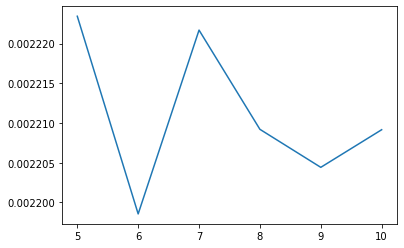

In [21]:
plt.plot(range(5, 11), mses_test)

In [17]:
mses_test

[0.002223445960185759,
 0.0021985554202256677,
 0.0022216996166789225,
 0.002209207548352618,
 0.0022044206941989474,
 0.0022091561522880232]

In [18]:
lr_sk = LinearRegression()

for i in range(5, 11):
    scores = cross_val_score(lr_sk, X, z, cv=i, scoring='neg_mean_squared_error')
    print(np.mean(scores))

-0.0022234459601331146
-0.0021976589936546203
-0.0022201568948306562
-0.002209207548314272
-0.0022022546662770013
-0.002209156152313909
